# PMP Taylor Diagram: Example

Visualize PMP's Mean climate metrics output using Taylor Diagram. This notebook generates a static image of Taylor Diagram for mean climate metrics obtained from CMIP5 and CMIP6 models, and compare multi-model averaged statistics from each group.

Written by Jiwoo Lee (LLNL/PCMDI)

Last update: September 2022

## 1. Generate a sample dataset

Presume a sample dataset from 10 models.

In [1]:
import numpy as np

stddev = np.random.uniform(low=1, high=10, size=(10,))  # Generate 10 random numbers between 1 and 10
corrcoeff = np.random.uniform(low=0.5, high=1, size=(10,))  # Generate 10 random numbers between 0.5 and 1
refstd = 5
models = ['model '+str(i) for i in range(1,11)]

## 2. Plot

In [2]:
import matplotlib.pyplot as plt
from pcmdi_metrics.graphics import TaylorDiagram

Usage of `TaylorDiagram` function:
       
        
Parameters
----------
    stddev : numpy.ndarray
        an array of standard deviations
    corrcoef : numpy.ndarray
        an array of correlation coefficients
    refstd : float
        the reference standard deviation
    fig : matplotlib figure, optional
        the matplotlib figure
    cmap : string, optional
        a name of matplotlib colormap
        https://matplotlib.org/stable/gallery/color/colormap_reference.html
    colors : array, optional
        an array or list of colors for each element of the input arrays
        if colors is given, it will override cmap
    normalize : bool, optional
        disable to skip normalization of the standard deviation
        default is False
    labels : list, optional
        list of text for labels
    markers : list, optional
        list of marker type
    markersizes : list, optional
        list of integer for marker size
    zorders : list, optional
        list of integer for zorder
    ref_label : str, optional
        label for reference data
    smax : int or float, optional
        maximum of axis range for (normalized) standard deviation
    compare_models : list of tuples, optional
        list of pair of two models to compare by showing arrows
    arrowprops_dict: dict, optional
        dict for matplotlib annotation arrowprops for compare_models arrow
        See https://matplotlib.org/stable/tutorials/text/annotations.html for details
    annotate_text : string, optional
        text to place at the begining of the comparing arrow
    radial_axis_title : string, optional
        axis title for radial axis
        default - Standard deviation (when normalize=False) or Normalized standard deviation (when normalize=True)
    angular_axis_title : string, optional
        axis title for angular axis
        default - Correlation

Return
------
    fig : matplotlib figure
        the matplotlib figure
    ax : matplotlib axis
        the matplotlib axis

### 2.1 Label all models

Text(0.5, 0.98, 'Example Taylor Diagram')

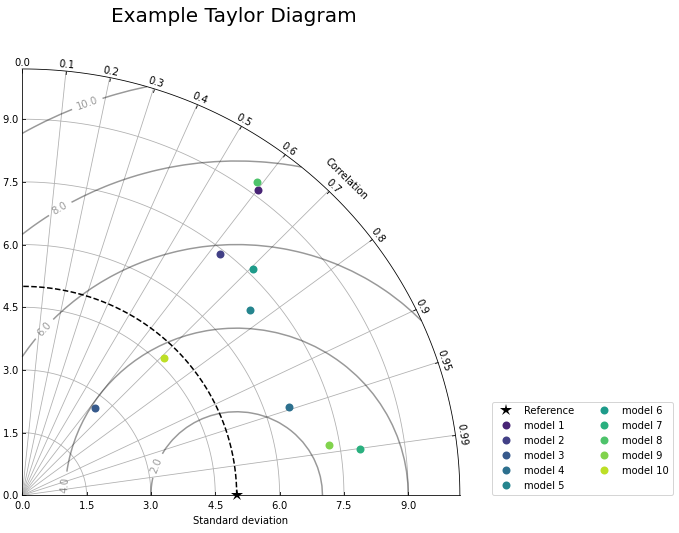

In [3]:
fig = plt.figure(figsize=(8,8))

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, 
                        fig=fig, 
                        labels=models, 
                        ref_label='Reference'
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=2)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.2 Normalize standard deviation (radial axis) by that of the reference dataset

Text(0.5, 0.98, 'Example Taylor Diagram')

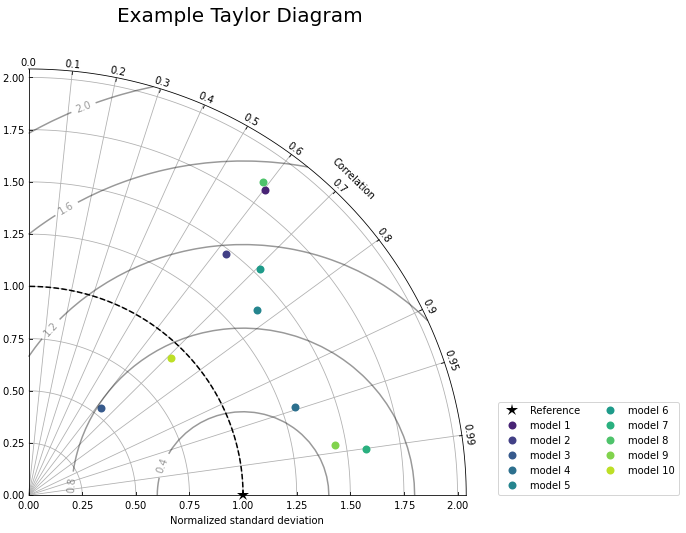

In [4]:
fig = plt.figure(figsize=(8,8))

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, 
                        fig=fig, 
                        normalize=True, 
                        labels=models, 
                        ref_label='Reference'
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=2)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.3 Label by model group

Text(0.5, 0.98, 'Example Taylor Diagram')

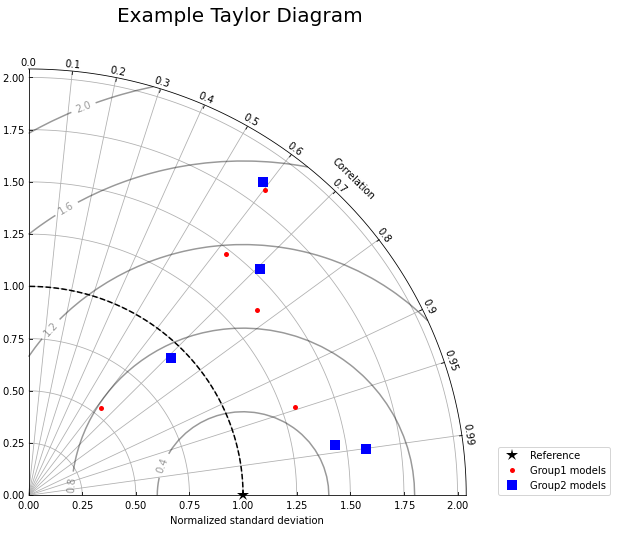

In [5]:
fig = plt.figure(figsize=(8,8))

colors1 = ['red'] * int(len(models)/2)  # For the first half models
colors2 = ['blue'] * int(len(models)/2)  # For the second half models

markers1 = ['o'] * int(len(models)/2)
markers2 = ['s'] * int(len(models)/2)

markersizes1 = [5] * int(len(models)/2)
markersizes2 = [10] * int(len(models)/2)

labels1 = ['Group1 models'] + [None] * int(len(models)/2 - 1)
labels2 = ['Group2 models'] + [None] * int(len(models)/2 - 1)

# combine colors, markers, markersizes, and labels
colors_new = colors1 + colors2
markers_new = markers1 + markers2
markersizes_new = markersizes1 + markersizes2
labels_new = labels1 + labels2

# Generate plot
fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, fig=fig, 
                        colors=colors_new, 
                        normalize=True, 
                        labels=labels_new, 
                        ref_label='Reference',
                        markers=markers_new, 
                        #zorders=zorders, 
                        markersizes=markersizes_new
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=1)
fig.suptitle('Example Taylor Diagram', fontsize=20)

### 2.3 Add model-comparing arrows

Text(0.5, 0.98, 'Example Taylor Diagram')

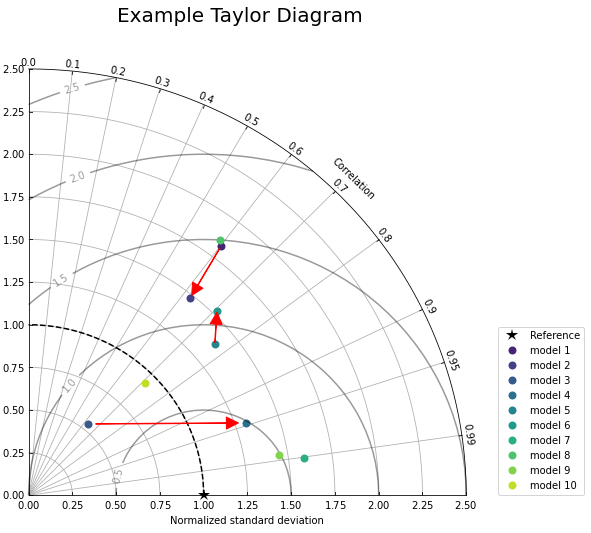

In [6]:
fig = plt.figure(figsize=(8,8))

arrowprops_dict = dict(color='red',
                       lw=1,
                       width=0.5,
                       shrink=0.05,
                       zorder=100,
                      )

fig, ax = TaylorDiagram(stddev, corrcoeff, refstd, 
                        fig=fig, 
                        normalize=True, 
                        labels=models, ref_label='Reference',
                        compare_models=[('model 1', 'model 2'),
                                        ('model 3', 'model 4'),
                                        ('model 5', 'model 6'),
                                       ],
                        arrowprops_dict=arrowprops_dict,
                        smax=2.5,
                       )

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', ncol=1)
fig.suptitle('Example Taylor Diagram', fontsize=20)